In [13]:
from pathlib import Path
import pprint
import numpy as np
import shutil
import matplotlib.pyplot as plt

int_to_str = {0:"CPR:3", 1:"CPR:4", 2:"CPR:5", 3:"CPR:6", 4:"CPR:9", 5:"NULL"}

## Displaying results

We will now add the results of RE to the same annotation file

In [22]:
def generate_brat(prob_path,pair_path,ann_path):
    global diff_list
    prob = np.loadtxt(prob_path)
    m,n = prob.shape
    indices = np.argmax(prob,axis=1)
    max_val = np.max(prob,axis=1)
    prob[range(0,m),indices] = 0
    max_val2 = np.max(prob,axis=1)
    
    diff_list.extend([(x,y) for x,y in zip(list(max_val-max_val2),list(indices))])
    class_ind = list(indices)
    count_list = [0]*6
    count = 0
    with open(pair_path,'r') as f:
        data = f.readlines()
        entity_pairs = [line.split() for line in data]
#     print(len(class_ind),len(entity_pairs))
    assert (len(class_ind)==len(entity_pairs))

    output_path = ann_path.parent / str(ann_path.name)[4:]
    shutil.copy(ann_path, output_path)
#     print(str(output_path))
    with open(output_path,'a') as f:
        for i in range(len(class_ind)):
            count_list[class_ind[i]] += 1
            if(class_ind[i]==5):
                continue
            f.write("R" + str(count) + "\t" + int_to_str[class_ind[i]] + " Arg1:" + entity_pairs[i][0] + " Arg2:" + entity_pairs[i][1] + "\n")
            count += 1
    return count_list

In [23]:
count_dict = {}
diff_list = []

def walk_dir(root):
    global count_dict
    if(root.is_dir()):
        for child in root.iterdir():
            walk_dir(child)
    else:
        if(root.name == 'test_results.tsv'):
            pair_path = root.parent / 'pairs.tsv'
            ann_path = root.parent / ('old_' + str(root.parent.name) + '.ann')
            if(ann_path.exists() and ann_path.exists()):
                count_dict[root.parent.name] = generate_brat(root,pair_path,ann_path)

In [24]:
walk_dir(Path('./processed/'))

In [25]:
# pprint.pprint(count_dict)

count = np.zeros(6)
for key in count_dict.keys():
    count += np.array(count_dict[key])

In [26]:
print(count)

[  146.    42.     0.     0.   870. 18046.]


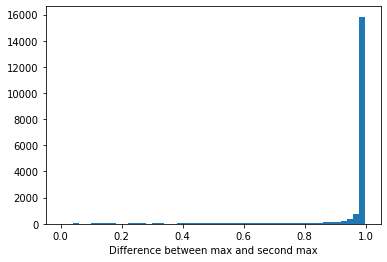

In [30]:
plt.hist([t[0] for t in diff_list],bins=50)
plt.xlabel('Difference between max and second max')
plt.show()

In [31]:
min(diff_list)

(0.0011137199999999847, 4)

In [32]:
sorted(diff_list)

[(0.0011137199999999847, 4),
 (0.0013242099999999923, 5),
 (0.0021809099999999804, 5),
 (0.004069580000000017, 4),
 (0.0041639800000000116, 4),
 (0.004633249999999978, 4),
 (0.005695349999999988, 5),
 (0.006041259999999993, 4),
 (0.007364660000000023, 5),
 (0.010128129999999957, 5),
 (0.012447869999999972, 5),
 (0.013380969999999992, 0),
 (0.013481749999999959, 5),
 (0.013574670000000066, 4),
 (0.013885959999999975, 4),
 (0.016120930000000033, 4),
 (0.016984029999999983, 1),
 (0.01825567999999994, 4),
 (0.02221430000000002, 5),
 (0.027781719999999954, 5),
 (0.028795860000000062, 5),
 (0.02991592999999998, 1),
 (0.030361819999999984, 4),
 (0.030640959999999995, 5),
 (0.03081476999999999, 5),
 (0.03273659999999995, 5),
 (0.033185179999999925, 4),
 (0.03380689999999997, 4),
 (0.0353039, 4),
 (0.03540021000000004, 5),
 (0.03549903999999998, 4),
 (0.03577526999999997, 4),
 (0.03588686000000002, 4),
 (0.037397319999999956, 4),
 (0.03770615999999993, 5),
 (0.03935176000000001, 4),
 (0.0400342